# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# **Data Exploration**

In [2]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [7]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [8]:
df = df.fillna(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df['Gender'] = df['Gender'].replace({"Male":0,"Female":1})

In [11]:
df.corr()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.057400,-0.026763,0.977548,0.013835
Gender,-0.057400,1.000000,-0.060867,-0.056410,0.058109
Age,-0.026763,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,0.058109,-0.327227,0.009903,1.000000


# **Data Visualization**

Text(0, 0.5, 'Count')

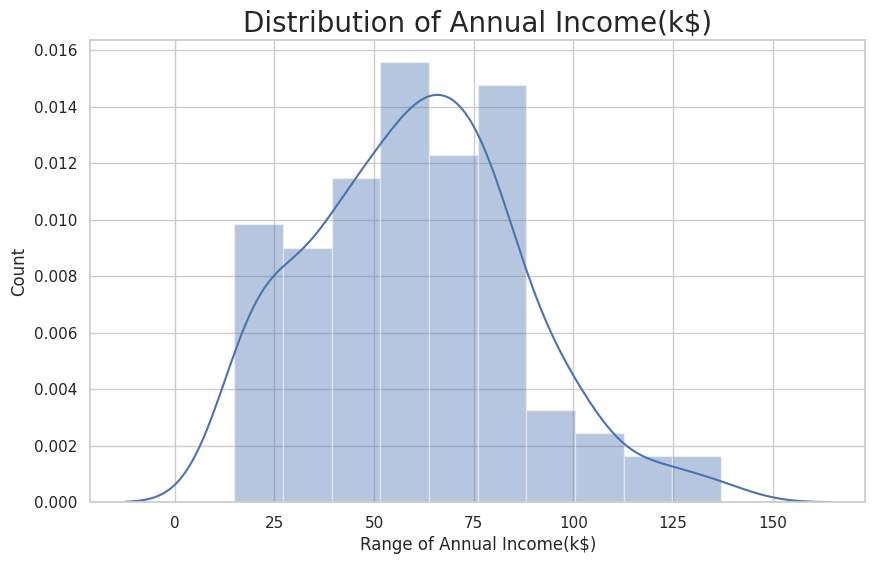

In [12]:
plt.figure(figsize = (10,6))
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title("Distribution of Annual Income(k$)",fontsize = 20)
plt.xlabel("Range of Annual Income(k$)")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

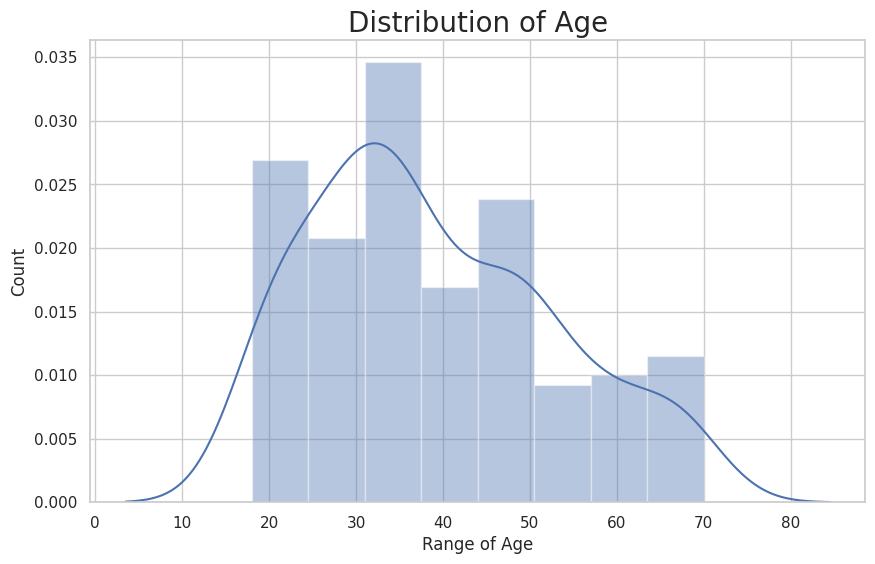

In [13]:
plt.figure(figsize = (10,6))
sns.set(style = 'whitegrid')
sns.distplot(df['Age'])
plt.title("Distribution of Age",fontsize = 20)
plt.xlabel("Range of Age")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

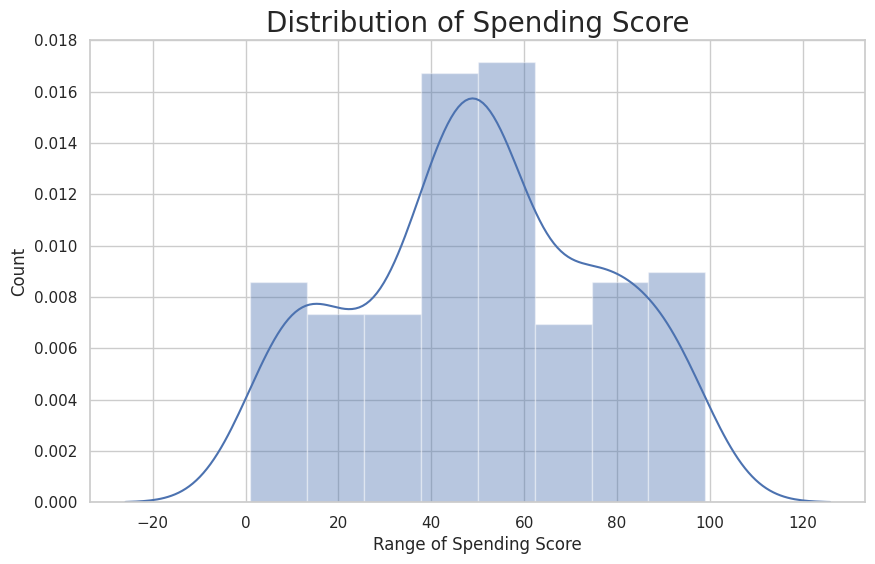

In [14]:
plt.figure(figsize = (10,6))
sns.set(style = 'whitegrid')
sns.distplot(df['Spending Score (1-100)'])
plt.title("Distribution of Spending Score",fontsize = 20)
plt.xlabel("Range of Spending Score")
plt.ylabel("Count")

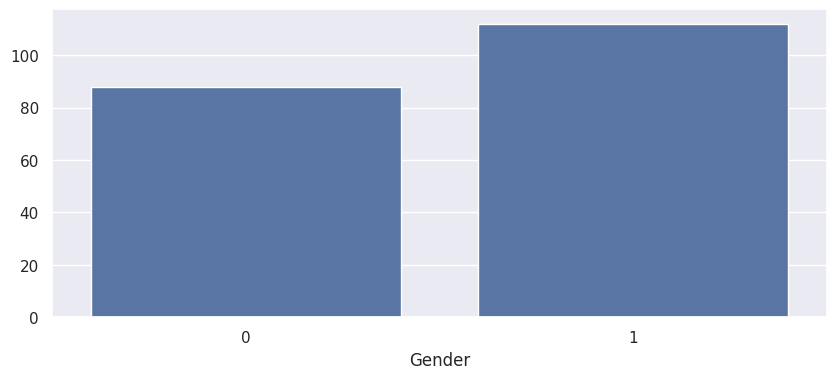

In [15]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize = (10,4))
sns.barplot(x = genders.index, y = genders.values)
plt.show()

In [16]:
df1=df[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

In [17]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


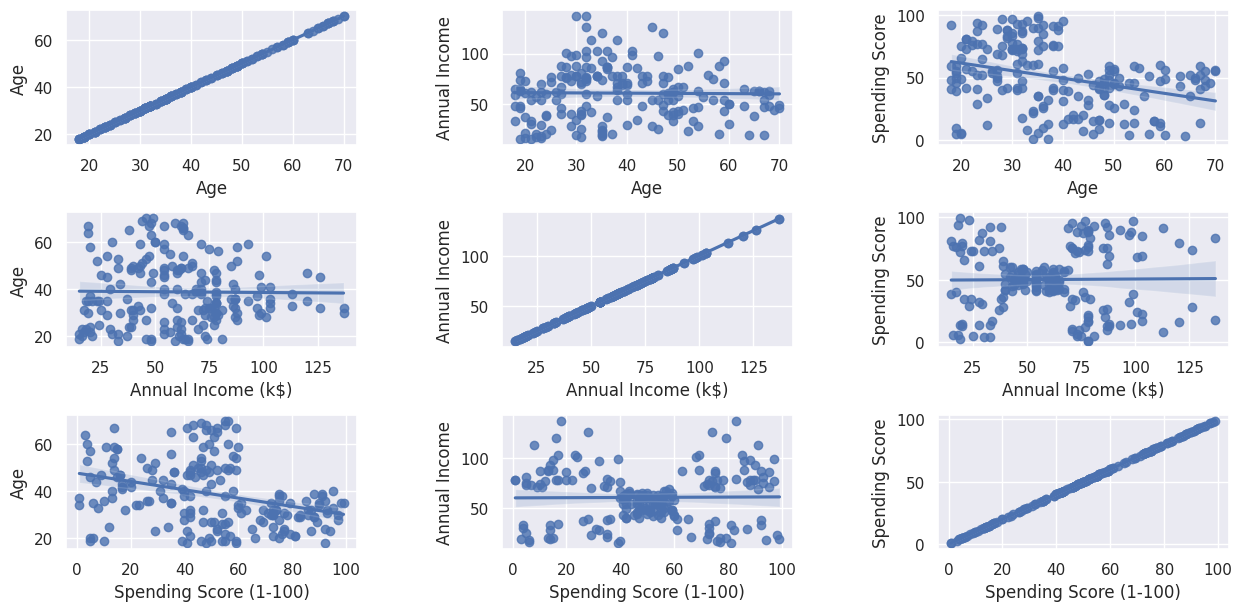

In [18]:
plt.figure(1,figsize = (15,7))
n = 0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
  for y in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(3,3,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.regplot(x = x, y = y,data = df)
    plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y)
plt.show()

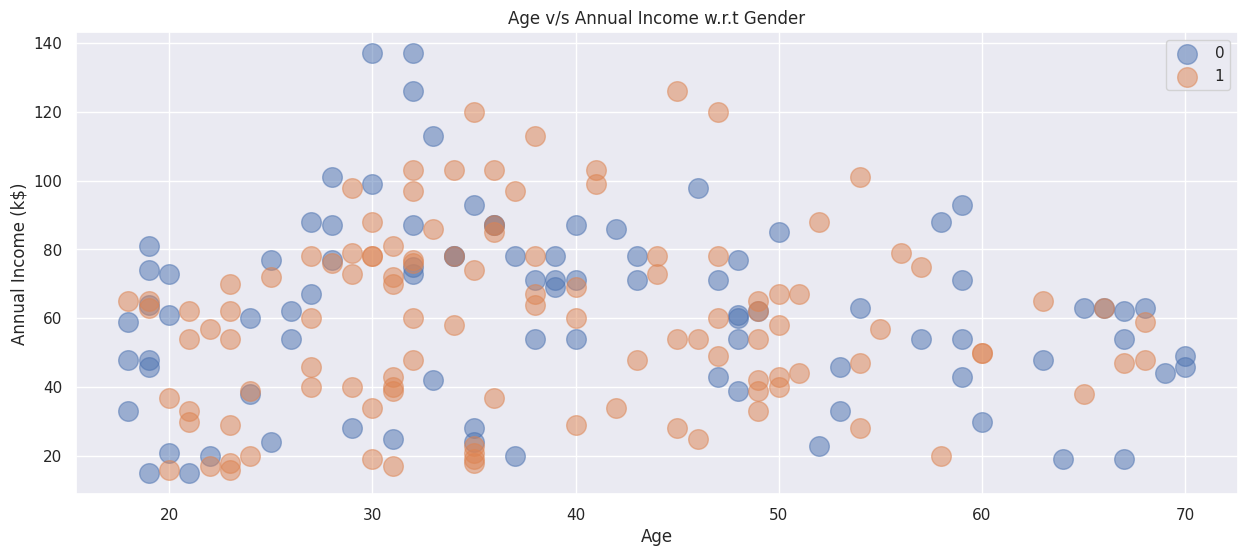

In [19]:
plt.figure(figsize = (15,6))
for gender in [0,1]:
  plt.scatter(x = 'Age',y = 'Annual Income (k$)',data = df[df['Gender'] == gender], s=200,alpha = 0.5,label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title("Age v/s Annual Income w.r.t Gender")
plt.legend()
plt.show()

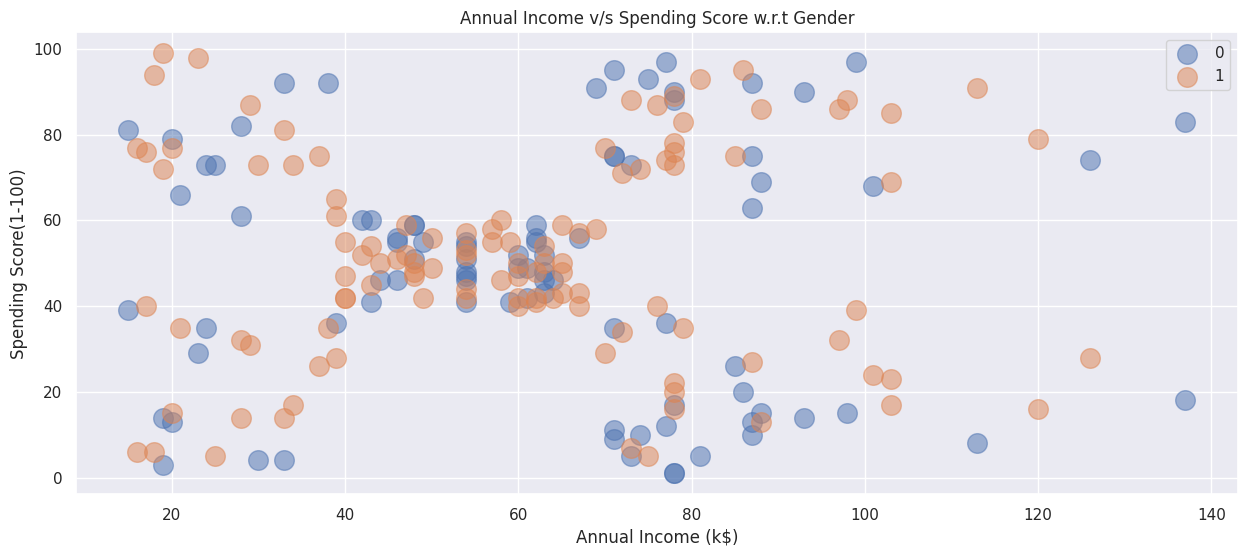

In [20]:
plt.figure(figsize = (15,6))
for gender in [0,1]:
  plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',data = df[df['Gender'] == gender], s=200,alpha = 0.5,label = gender)
plt.xlabel("Annual Income (k$)"), plt.ylabel('Spending Score(1-100)')
plt.title("Annual Income v/s Spending Score w.r.t Gender")
plt.legend()
plt.show()

# **Clustering using K-Means**

In [21]:
from sklearn.cluster import KMeans

In [23]:
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters = i)
  km.fit(X)
  wcss.append(km.inertia_)

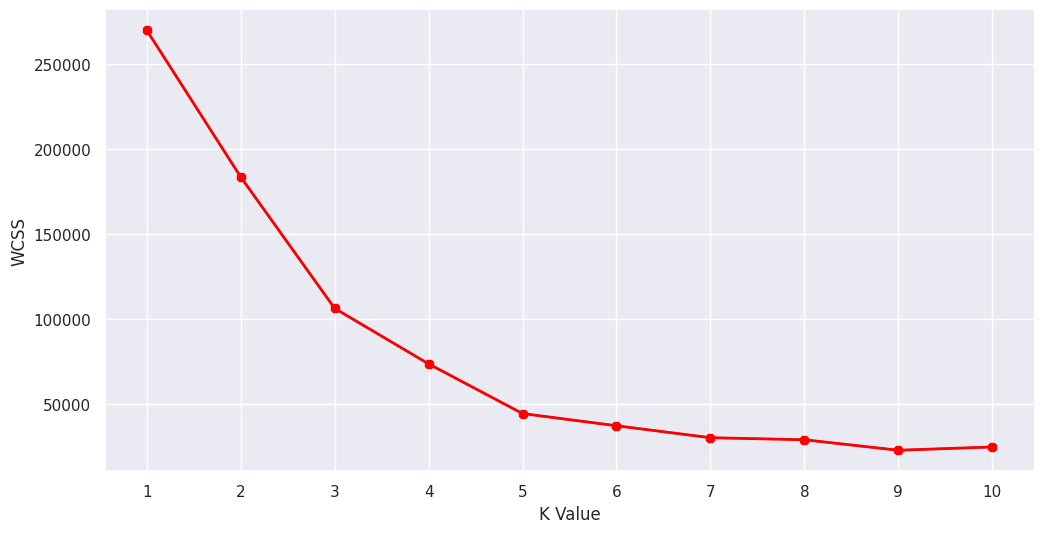

In [27]:
plt.figure (figsize = (12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss,linewidth = 2,color = 'red',marker = '8')
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [28]:
km1 = KMeans(n_clusters = 5)
km1.fit(X)
y = km1.predict(X)
df1['label'] = y
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,0,19,15,39,0
1,2,0,21,15,81,0
2,3,1,20,16,6,0
3,4,1,23,16,77,0
4,5,1,31,17,40,0


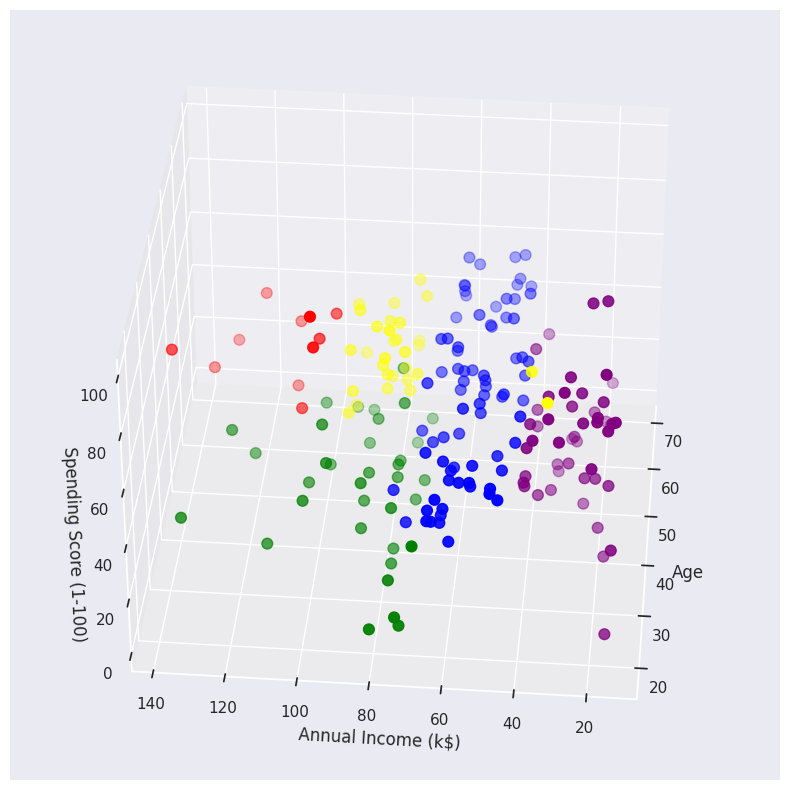

In [29]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.Age[df1.label == 0], df1["Annual Income (k$)"][df1.label == 0], df1["Spending Score (1-100)"][df1.label == 0], c='purple', s=60)
ax.scatter(df1.Age[df1.label == 1], df1["Annual Income (k$)"][df1.label == 1], df1["Spending Score (1-100)"][df1.label == 1], c='red', s=60)
ax.scatter(df1.Age[df1.label == 2], df1["Annual Income (k$)"][df1.label == 2], df1["Spending Score (1-100)"][df1.label == 2], c='blue', s=60)
ax.scatter(df1.Age[df1.label == 3], df1["Annual Income (k$)"][df1.label == 3], df1["Spending Score (1-100)"][df1.label == 3], c='green', s=60)
ax.scatter(df1.Age[df1.label == 4], df1["Annual Income (k$)"][df1.label == 4], df1["Spending Score (1-100)"][df1.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [30]:
cust1=df1[df1["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df1[df1["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df1[df1["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df1[df1["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=df1[df1["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 11
They are - [180 182 184 186 188 190 192 194 196 198 200]
--------------------------------------------
Number of customer in 2nd group= 76
They are - [ 51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 127 133 143]
--------------------------------------------
Number of customer in 3rd group= 48
They are - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 35 36 37 38 39 40 41 43 44 45 46 47 48 49 50]
--------------------------------------------
Number of customer in 4th group= 35
They are - [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
-------------------------------